In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def random_perm(n):
    v = [i for i in range(n)]
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        v[i], v[j] = v[j], v[i]
    return v

In [3]:
def insertion_sort(arr):
    """
    Retorna una tupla con la cantidad de instrucciones, comparaciones y swaps (intercambios)
    """
    ins = 0  # instrucciones
    comp = 0  # comparaciones
    swaps = 0  # swaps (intercambios)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        ins += 3    # i = ; key =; j = ;
        while j >= 0 and key < arr[j]:
            comp += 1  # key < arr[j];
            arr[j+1] = arr[j]   # Desplaza hacia la derecha el valor
            swaps += 1
            j -= 1
            ins += 3    # arr[j+1] =; j =; j >=;
        arr[j+1] = key; ins += 1
    return ins, comp, swaps

In [4]:
instructions = []   # Lista para manejar las instrucciones
comparisons = []    # Lista para manejar las comparaciones
swaps = []      # Lista para manejar los swaps
max = 33    # Cantidad maxima de permutaciones
runs = 50   # Cantidad de veces que se ordenaran

In [5]:
for n in range(1, max):
    i_aux = []
    c_aux = []
    s_aux = []
    for _ in range(runs):
        p = random_perm(n)
        #print(p)
        i, c, s = insertion_sort(p)
        #print("i: {}, c: {}, s: {}".format(i, c, s))
        i_aux.append(i)
        c_aux.append(c)
        s_aux.append(s)

    instructions.append(i_aux)
    comparisons.append(c_aux)
    swaps.append(s_aux)

In [6]:
def means(seq):
    """
    Retorna una lista con las medias de cada lista dentro de la secuencia
    """
    return [np.mean(s) for s in seq]

[0.0, 5.0800000000000001, 13.34, 21.359999999999999, 30.760000000000002, 42.859999999999999, 55.560000000000002, 67.900000000000006, 82.579999999999998, 105.84, 124.48, 140.41999999999999, 168.66, 187.66, 212.30000000000001, 247.38, 270.63999999999999, 299.83999999999997, 328.98000000000002, 370.83999999999997, 396.86000000000001, 431.10000000000002, 475.72000000000003, 501.25999999999999, 537.05999999999995, 587.67999999999995, 619.27999999999997, 694.20000000000005, 722.38, 773.29999999999995, 798.17999999999995, 887.38]
[0.0, 0.35999999999999999, 1.78, 3.1200000000000001, 4.9199999999999999, 7.6200000000000001, 10.52, 13.300000000000001, 16.859999999999999, 23.280000000000001, 28.16, 32.140000000000001, 40.219999999999999, 45.219999999999999, 52.100000000000001, 62.460000000000001, 68.879999999999995, 77.280000000000001, 85.659999999999997, 98.280000000000001, 105.62, 115.7, 129.24000000000001, 136.41999999999999, 147.02000000000001, 162.56, 171.75999999999999, 195.40000000000001, 2

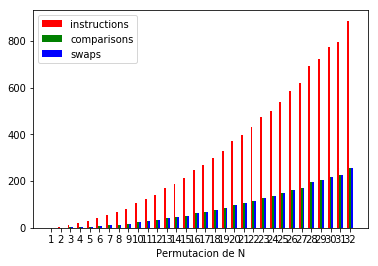

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
x_axe = np.arange(1, max)
w = 0.2     # width

ins_means = means(instructions)
ax.bar(x_axe, ins_means, w, color="r")

comp_means = means(comparisons)
ax.bar(x_axe+w, comp_means, w, color="g")

swaps_means = means(swaps)
ax.bar(x_axe+2*w, swaps_means, w, color="b")

ax.set_xticks(x_axe+w)
ax.set_xticklabels(np.arange(1, max))
ax.legend(["instructions", "comparisons", "swaps"])
ax.set_xlabel("Permutacion de N")

print(ins_means)
print(comp_means)
print(swaps_means)

plt.show()